In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sigproc_kit import *

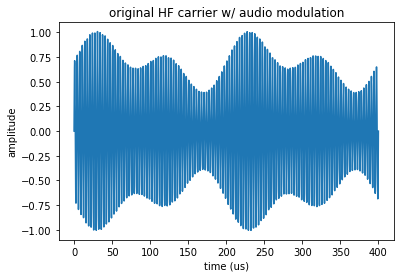

In [3]:
x= np.linspace(0,400,2000)
f = 0.3 # 100kHz
g = 0.005 # 5 kHz
y= 0.7*np.sin(f*2*np.pi*x)*\
(1+0.25*np.sin(g*2*np.pi*x)\
 + 0.25*np.sin(2*g*2*np.pi*x)\
)

plt.plot(x,y,alpha=1)
plt.ylabel("amplitude")
plt.xlabel("time (us)")
plt.ylim([-1.1,1.1])
plt.title("original HF carrier w/ audio modulation")
plt.show()

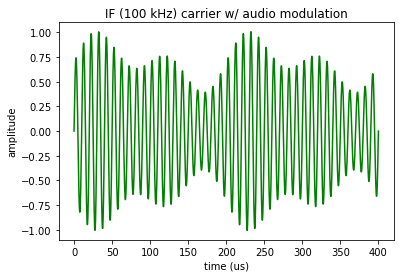

In [4]:
x= np.linspace(0,400,2000)
f = 0.1 # 100kHz
g = 0.005 # 5 kHz
y= 0.7*np.sin(f*2*np.pi*x)*\
(1+0.25*np.sin(g*2*np.pi*x)\
 + 0.25*np.sin(2*g*2*np.pi*x)\
)

plt.plot(x,y,color="green")
plt.ylabel("amplitude")
plt.xlabel("time (us)")
plt.ylim([-1.1,1.1])
plt.title("IF (100 kHz) carrier w/ audio modulation")
plt.show()

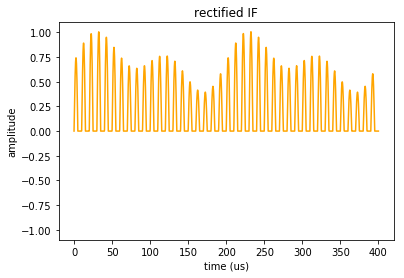

In [5]:
x= np.linspace(0,400,2000)
f = 0.1 # 100kHz
g = 0.005 # 5 kHz
y= 0.7*np.sin(f*2*np.pi*x)*\
(1+0.25*np.sin(g*2*np.pi*x)\
 + 0.25*np.sin(2*g*2*np.pi*x)\
)

y = y* (y>0)

plt.plot(x,y,color="orange")
plt.ylabel("amplitude")
plt.xlabel("time (us)")
plt.ylim([-1.1,1.1])
plt.title("rectified IF")
plt.show()

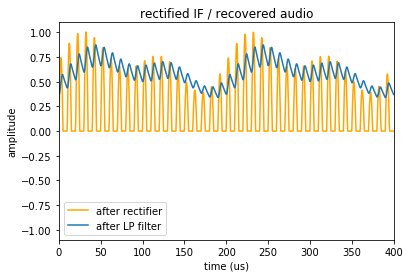

In [54]:



x= np.linspace(0,800,2000)

kernel = np.exp(-x/20)


f = 0.1 # 100kHz
g = 0.005 # 5 kHz
y= 0.7*np.sin(f*2*np.pi*x)*\
(1+0.25*np.sin(g*2*np.pi*x)\
 + 0.25*np.sin(2*g*2*np.pi*x)\
)

y = y* (y>0)


after_RC = 0.13*fft_convolve(x,[y,kernel])
x-=400
plt.plot(x,y,color="orange",label="after rectifier")
#plt.plot(x,kernel,color="blue")

plt.plot(x,after_RC,label="after LP filter")


plt.ylabel("amplitude")
plt.xlabel("time (us)")
plt.ylim([-1.1,1.1])
plt.xlim([000,400])
plt.title("rectified IF / recovered audio")
plt.legend()
plt.show()

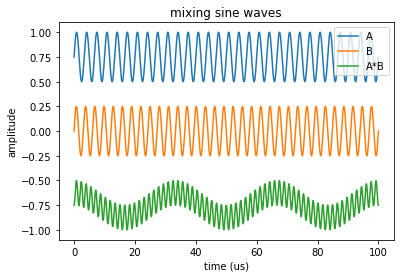

In [45]:
x= np.linspace(0,100,2000)
a= np.sin(.3*2*np.pi*x)
b= np.sin(.33*2*np.pi*x)
c= a*b 

plt.plot(x,.25*a+0.75,label="A")
plt.plot(x,.25*b,label="B")
plt.plot(x,.25*c-0.75,label="A*B")
plt.ylabel("amplitude")
plt.xlabel("time (us)")
plt.ylim([-1.1,1.1])
plt.title("mixing sine waves")
plt.legend()
plt.show()

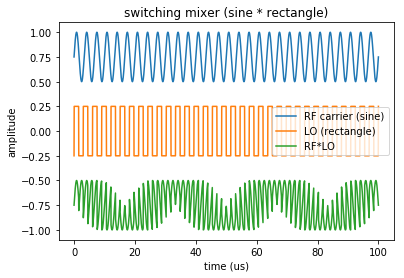

In [44]:
def sqwave(x):
  return 2*((np.ceil(x/np.pi)%2)-0.5)

x= np.linspace(0,100,2000)
a= np.sin(.3*2*np.pi*x)
b= sqwave(.33*2*np.pi*x)
c= a*b 

plt.plot(x,.25*a+0.75,label="RF carrier (sine)")
plt.plot(x,.25*b,label="LO (rectangle)")
plt.plot(x,.25*c-0.75,label="RF*LO")
plt.ylabel("amplitude")
plt.xlabel("time (us)")
plt.ylim([-1.1,1.1])
plt.title("switching mixer (sine * rectangle)")
plt.legend()
plt.show()